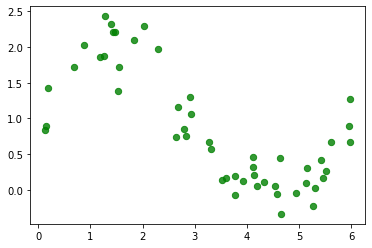

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('D:\\VS_Projects\\Skillbox\\ML_Learning\\non_linear.csv')
data.head()

plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label ='data')

In [2]:
def generate_degrees(source_data: list, degree:int):
    return np.array([
        source_data**n for n in range(1, degree+1)
    ]).T

In [3]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [66]:
def train_polynomial(degree, data):
    """Генерация датасета и обучение модели"""
    X = generate_degrees(data['x_train'], degree)
    y = data['y_train']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    print("Степень полинома %d" % degree)
    print("Качество на валидации %.3f" % mean_squared_error(y_valid, y_pred))
    print("Качество на тренировке %.3f" % mean_squared_error(y_train, y_pred_train))
    order_test = np.argsort(X_valid[:,0])
    # print(order_test)
    print(X_valid[:,0][order_test])
    
    plt.scatter(X_valid[:,0][order_test], y_valid.loc[order_test.], 20, 'r', 'o')
    # print("Норма вектора весов \t |w| = %.2f" % (norm(model.coef_)))

In [67]:
train_polynomial(5, data)

Степень полинома 5
Качество на валидации 0.063
Качество на тренировке 0.069
[0.68555275 1.25160548 1.27047391 2.91202682 3.31455321 4.10702703
 4.64163239 5.30831672 5.44668516 5.94984314]


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([9, 8, 5, 1, 0, 2, 4], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"